In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime

1) Log file is loaded

In [3]:
file = open("log.txt", "r") 
lines = file.readlines()
for l in range(3): print(lines[l][:-1])

156.15.13.173 [01/Jan/2018:11:13:49 +0100] "GET AddProduct.html HTTP/1.0" 200 2356
176.247.135.49 [01/Jan/2018:11:18:07 +0100] "GET Shop.html HTTP/1.0" 200 7466
176.247.135.49 [01/Jan/2018:11:19:05 +0100] "GET AddProduct.html HTTP/1.0" 200 2356


2) Cass "Request" parses and keeps data of a single requests. Complete the TODO, where a given "line" (string) should be parsed in order to dervie the ip of the host making the request, time of the request (in seconds), and target page (name).

In [4]:
class Request:
    def __init__(self, line):
        # TODO DO PARSING HERE
        
        self.ip = "0.0.0.0"
        # convert hours + minutes + seconds -> total number of seconds
        self.time = 0
        self.page = "error.html"
        
        splited = line.split(" ")
        self.ip = splited[0]
        time = splited[1].split(":")
        self.time = int(time[1]) * 3600 + int(time[2]) * 60 + int(time[3])
        self.page = splited[4]
        
    def __repr__(self):
        return self.ip + "     " +  str(datetime.timedelta(seconds=self.time)) + " -> " + self.page


3) Each line of log.txt is parsed and the Request objects are added to the list

In [5]:
reqs = [Request(line) for line in lines]
for l in range(10): print(reqs[l]) 

156.15.13.173     11:13:49 -> AddProduct.html
176.247.135.49     11:18:07 -> Shop.html
176.247.135.49     11:19:05 -> AddProduct.html
176.247.135.49     11:29:05 -> Summary.html
69.84.30.199     11:43:59 -> Shop.html
69.84.30.199     11:45:16 -> AddProduct.html
57.116.45.120     11:46:45 -> AddProduct.html
69.84.30.199     11:50:36 -> Summary.html
69.84.30.199     11:52:38 -> Payment.html
26.19.183.202     11:53:11 -> AddProduct.html


# Exercise

Your task is to analyze the log file. You should indentify the users and sessions. Then, compute the following: <br>
3.1) the number of sessions (should be 1000 :) ), <br>
3.2) the number of users, <br>
3.3) the average number of sessions per one user <br>
3.4) use the distribution plot to visualize the sessions' lengths (minutes);  <br>
3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) <br>
3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
3.9) for each page plot the average time the user stayed on this page <br>
3.10) print the fist 10 sessions (paths). <br>

You may find the following classes helpful and data.

In [6]:
class Session:
    def __init__(self):
        self.startTime = 0
        self.stopTime = 0
        self.requests = []
        
    def __repr__(self):
        print("SESSION")
        print(self.startTime)
        print(self.stopTime)
        STR = ""
        for r in self.requests:
            print(r)
            STR += ("  " + r.page + "    " + str(datetime.timedelta(seconds=r.time)) + "\n")
        return STR

class Computer:
    def __init__(self):
        self.ip = []
        self.sessions = []
    def __repr__(self):
        return self.ip

PAGES = ["Shop.html", "AddProduct.html", "Summary.html", "Payment.html","About.html", "Contact.html"]

LINKS = [[1, 4],
         [2,4],
         [3],
         [],
         [1,5],
         []]

#plot distribution
#count, bins, ignored = plt.hist(data, 50, alpha=0.5, normed=True)
#plt.plot()

#x_axis = np.arange(len(pages))
#plt.bar(x_axis, data, align='center', alpha=0.5)
#plt.xticks(y_pos, pages, rotation=90)

In [82]:
theta = 1800
computers = dict()
reqs = [Request(line) for line in lines]
for r in reqs:
    add = False
    if r.ip not in computers:
        computers[r.ip] = Computer()
    computers[r.ip].ip = r.ip
    for s in computers[r.ip].sessions:
        if r.time - s.startTime <= theta:
            add = True
            s.stopTime = r.time
            s.requests.append(r)
    if(add == False):
        new = Session()
        new.startTime = r.time
        new.stopTime = r.time
        new.requests.append(r)
        computers[r.ip].sessions.append(new)


In [61]:
users = len(computers)
print(users, "użytkowników")
ses = 0
for c in computers:
    ses += len(computers[c].sessions)
print(ses, "sesji")
print(ses/users, "średnio sesji na użytkownika")

391 użytkowników
1001 sesji
2.5601023017902813 średnio sesji na użytkownika


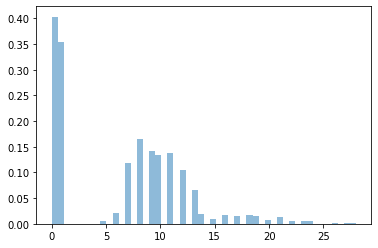

In [107]:
data = []
for c in computers:
    for s in computers[c].sessions:
        data.append(int((s.stopTime - s.startTime)/60))
count, bins, ignored = plt.hist(data, 50, alpha=0.5, density=True)

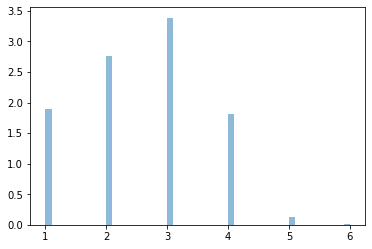

In [64]:
data = []
for c in computers:
    for s in computers[c].sessions:
        data.append(len(s.requests))
count, bins, ignored = plt.hist(data, 50, alpha=0.5, density=True)

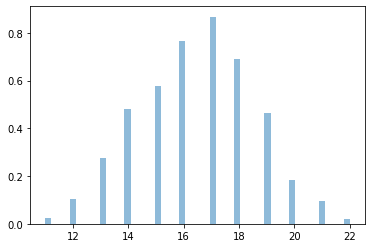

In [90]:
data = []
for c in computers:
    for s in computers[c].sessions:
        data.append(int(s.startTime/3600))
count, bins, ignored = plt.hist(data, 50, alpha=0.5, density=True)

([<matplotlib.axis.XTick at 0x2677ccfcac8>,
 <a list of 6 Text xticklabel objects>)

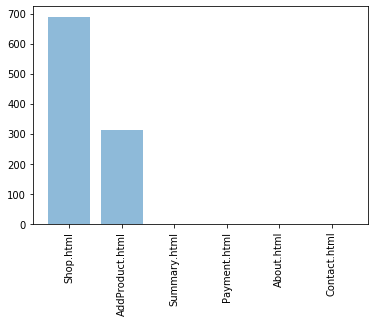

In [106]:
data = []
for n in np.arange(len(PAGES)):
    data.append(0)
for c in computers:
    for s in computers[c].sessions:
        data[PAGES.index(s.requests[0].page)] += 1
x_axis = np.arange(len(PAGES))
plt.bar(x_axis, data, align='center', alpha=0.5)
plt.xticks(x_axis, PAGES, rotation=90)

([<matplotlib.axis.XTick at 0x2677cdcf048>,
 <a list of 6 Text xticklabel objects>)

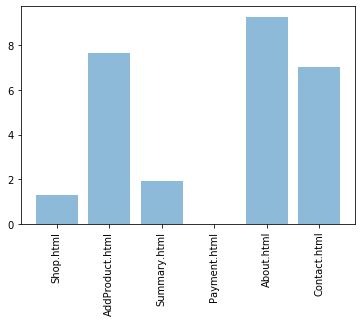

In [105]:
data = []
times = []
for n in np.arange(len(PAGES)):
    data.append(0)
    times.append(0)
for c in computers:
    for s in computers[c].sessions:
        for i in np.arange(len(s.requests[:-1])):
            times[PAGES.index(s.requests[i].page)] += s.requests[i + 1].time - s.requests[i].time
            data[PAGES.index(s.requests[i].page)] += 1

data = [times[x]/data[x]/60 if data[x]!=0 else 0 for x in np.arange(len(PAGES))]
x_axis = np.arange(len(PAGES))
plt.bar(x_axis, data, align='center', alpha=0.5)
plt.xticks(x_axis, PAGES, rotation=90)

In [89]:
data = []
for c in computers:
    for s in computers[c].sessions:
        data.append(s.startTime)
data.sort()
data = data[:10]
for c in computers:
    for s in computers[c].sessions:
        if s.startTime in data:
            print(s)

SESSION
40429
40429
156.15.13.173     11:13:49 -> AddProduct.html
  AddProduct.html    11:13:49

SESSION
40687
41345
176.247.135.49     11:18:07 -> Shop.html
176.247.135.49     11:19:05 -> AddProduct.html
176.247.135.49     11:29:05 -> Summary.html
  Shop.html    11:18:07
  AddProduct.html    11:19:05
  Summary.html    11:29:05

SESSION
42239
42758
69.84.30.199     11:43:59 -> Shop.html
69.84.30.199     11:45:16 -> AddProduct.html
69.84.30.199     11:50:36 -> Summary.html
69.84.30.199     11:52:38 -> Payment.html
  Shop.html    11:43:59
  AddProduct.html    11:45:16
  Summary.html    11:50:36
  Payment.html    11:52:38

SESSION
42405
42927
57.116.45.120     11:46:45 -> AddProduct.html
57.116.45.120     11:53:25 -> Summary.html
57.116.45.120     11:55:27 -> Payment.html
  AddProduct.html    11:46:45
  Summary.html    11:53:25
  Payment.html    11:55:27

SESSION
42791
43610
26.19.183.202     11:53:11 -> AddProduct.html
26.19.183.202     11:59:00 -> About.html
26.19.183.202     12:06:50 -